# **Data Analysis on factors affecting HDB prices**

## 1. Introduction

Business problem :

## 2. Data Loading

Import dependencies and libraries

In [87]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read files

In [88]:
file_path_1999 = 'C:/personal_projects/hdb_project/datasets/hdb_resale_1990_1999.csv'
file_path_2012 = 'C:\personal_projects\hdb_project\datasets\hdb_resale_2000_2012.csv'
file_path_2014 = 'C:\personal_projects\hdb_project\datasets\hdb_resale_2012_2014.csv'
file_path_2016 = 'C:\personal_projects\hdb_project\datasets\hdb_resale_2015_2016.csv'
file_path_2017 = 'C:\personal_projects\hdb_project\datasets\hdb_resale_2017onwards.csv'
file_path_cpi = 'C:\personal_projects\hdb_project\datasets\housing_cpi.csv'
df1 = pd.read_csv(file_path_1999)
df2 = pd.read_csv(file_path_2012)
df3 = pd.read_csv(file_path_2014)
df4 = pd.read_csv(file_path_2016)
df5 = pd.read_csv(file_path_2017)

cpi = pd.read_csv(file_path_cpi)

Inspect headers

In [89]:
df1.head(1)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000


In [90]:
df2.head(1)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0


In [91]:
df3.head(1)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0


In [92]:
df4.head(1)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0


In [93]:
df5.head(1)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0


Merging of dataframes

In [94]:
prices = pd.concat([df1,df2,df3,df4,df5], ignore_index=True)

In [95]:
prices.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


Conversion of data types and renaming of headers

In [96]:
prices['month'] = pd.to_datetime(prices['month']) # to datetime
prices['lease_commence_date'] = pd.to_datetime(prices['lease_commence_date']) # to datetime
prices = prices.rename(columns={'month':'transaction_date'}) # rename header

In [97]:
prices.tail(1)

,transaction_date,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
929454,2024-07-01,YISHUN,EXECUTIVE,277,YISHUN ST 22,01 TO 03,146.0,Maisonette,1970-01-01 00:00:00.000001985,770000.0,60 years 03 months


In [98]:
prices.dtypes

transaction_date       datetime64[ns]
town                           object
flat_type                      object
block                          object
street_name                    object
storey_range                   object
floor_area_sqm                float64
flat_model                     object
lease_commence_date    datetime64[ns]
resale_price                  float64
remaining_lease                object
dtype: object

## 3. Data Cleaning

In [99]:
prices['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [100]:
prices['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [101]:
prices['storey_range'].unique()

array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
       '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '06 TO 10',
       '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30',
       '36 TO 40', '31 TO 35', '46 TO 48', '43 TO 45', '49 TO 51'],
      dtype=object)

In [102]:
prices['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object)

Rename flat model duplicates naming to ensure data consistency

In [103]:
# Rename flat model duplicates
replace_values = {'NEW GENERATION':'New Generation', 'SIMPLIFIED':'Simplified', 'STANDARD':'Standard', 
                  'MODEL A-MAISONETTE':'Maisonette', 'MULTI GENERATION':'Multi Generation', 'IMPROVED-MAISONETTE':'Executive Maisonette', 
                  'Improved-Maisonette':'Executive Maisonette', 'Premium Maisonette':'Executive Maisonette', '2-ROOM':'2-room', 
                  'MODEL A':'Model A', 'MAISONETTE':'Maisonette', 'Model A-Maisonette':'Maisonette', 'IMPROVED':'Improved', 
                  'TERRACE':'Terrace', 'PREMIUM APARTMENT':'Premium Apartment', 'Premium Apartment Loft':'Premium Apartment', 
                  'APARTMENT':'Apartment', 'Type S1':'Type S1S2', 'Type S2':'Type S1S2'}

prices = prices.replace({'flat_model': replace_values})

prices['flat_model'].value_counts()

flat_model
Model A                 266039
Improved                242377
New Generation          189262
Simplified               57625
Premium Apartment        47139
Standard                 42597
Apartment                35568
Maisonette               31811
Model A2                 10165
DBSS                      3334
Adjoined flat             1254
Terrace                    694
Type S1S2                  656
Multi Generation           544
Executive Maisonette       212
2-room                     145
3Gen                        33
Name: count, dtype: int64

#### Handling missing values

##### Imputating the values of `remaining_lease`

In [104]:
prices.isnull().sum()

transaction_date            0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [105]:
# Function to convert 'remaining_lease' to numerical format
def convert_lease_to_years(lease_str):
    if isinstance(lease_str, str):  # Check if the value is a string
        match = re.match(r"(\d+) years(?: (\d+) months?)?", lease_str)
        if match:
            years = int(match.group(1))
            months = int(match.group(2)) if match.group(2) else 0
            return years + months / 12
    return lease_str  # Return the value as is if it's not a string

# Apply the function to the 'remaining_lease' column
prices['remaining_lease'] = prices['remaining_lease'].apply(convert_lease_to_years)

# Display the modified DataFrame
print(prices)

       transaction_date        town  flat_type block       street_name  \
0            1990-01-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1   
1            1990-01-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1   
2            1990-01-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1   
3            1990-01-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1   
4            1990-01-01  ANG MO KIO     3 ROOM   216  ANG MO KIO AVE 1   
...                 ...         ...        ...   ...               ...   
929450       2024-07-01      YISHUN     5 ROOM  674B      YISHUN AVE 4   
929451       2024-07-01      YISHUN     5 ROOM  342A    YISHUN RING RD   
929452       2024-07-01      YISHUN     5 ROOM   297      YISHUN ST 20   
929453       2024-07-01      YISHUN  EXECUTIVE   406      YISHUN AVE 6   
929454       2024-07-01      YISHUN  EXECUTIVE   277      YISHUN ST 22   

       storey_range  floor_area_sqm         flat_model  \
0          10 TO 12            31.0           Improve

In [106]:
# Calculate elapsed years
prices['elapsed_years'] = (prices['transaction_date'].dt.year - prices['lease_commence_date'].dt.year) + \
                          (prices['transaction_date'].dt.month - prices['lease_commence_date'].dt.month) / 12

# Calculate remaining lease where NaN
prices.loc[prices['remaining_lease'].isnull(), 'remaining_lease'] = 99 - prices['elapsed_years']

# Drop the temporary columns
prices.drop(columns=['elapsed_years'], inplace=True)

# Display the modified DataFrame
prices.head()

,transaction_date,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1970-01-01 00:00:00.000001977,9000.0,79.0
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,Improved,1970-01-01 00:00:00.000001977,6000.0,79.0
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1970-01-01 00:00:00.000001977,8000.0,79.0
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,Improved,1970-01-01 00:00:00.000001977,6000.0,79.0
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1970-01-01 00:00:00.000001976,47200.0,79.0


In [107]:
prices.isna().sum()

transaction_date       0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

In [108]:
prices['remaining_lease'] = pd.to_numeric(prices['remaining_lease'])


#### Handling outliers

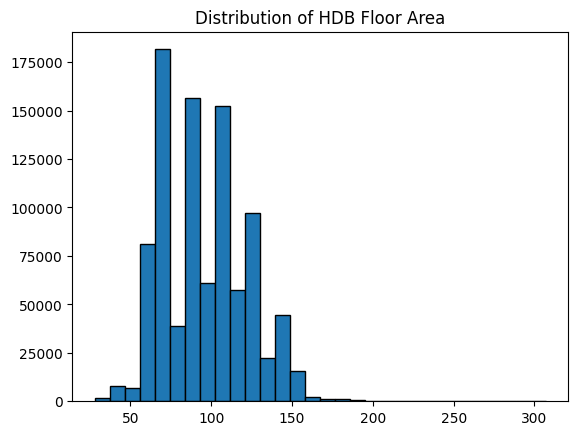

In [109]:
plt.hist(prices['floor_area_sqm'], bins=30, edgecolor='black')
plt.title('Distribution of HDB Floor Area')
plt.show()

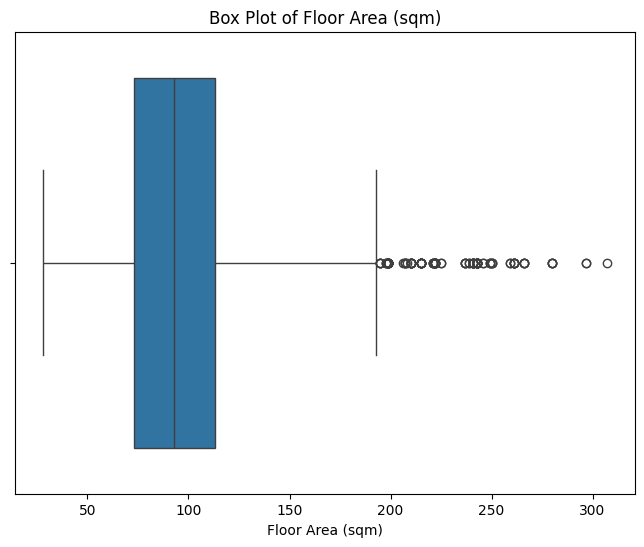

In [110]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=prices['floor_area_sqm'], whis=2)
plt.title('Box Plot of Floor Area (sqm)')
plt.xlabel('Floor Area (sqm)')
plt.show()

In [111]:
# Calculate outliers based on box plot whiskers
Q1 = prices['floor_area_sqm'].quantile(0.25)
Q3 = prices['floor_area_sqm'].quantile(0.75)
IQR = Q3 - Q1
print("Q3: ", Q3," IQR: ", IQR)
# Calculate upper bound for outliers
upper_bound = Q3 + 2 * IQR 
print("Upper bound: ", upper_bound)
print("\f")
# Filter rows where floor_area_sqm exceeds the upper bound (outliers)
outliers = prices[prices['floor_area_sqm'] > upper_bound]

# Count the occurrences of each flat_type among the outliers
flat_model_counts = outliers['flat_model'].value_counts()

print("Flat Type Counts among Outliers:")
print(flat_model_counts)

Q3:  113.0  IQR:  40.0
Upper bound:  193.0

Flat Type Counts among Outliers:
flat_model
Terrace                 75
Maisonette              31
Executive Maisonette     7
Apartment                5
Adjoined flat            1
Name: count, dtype: int64


The outliers identified in floor area mostly belong to special HDBs, which are larger than standard ones. Therefore, they might not be considered outliers.

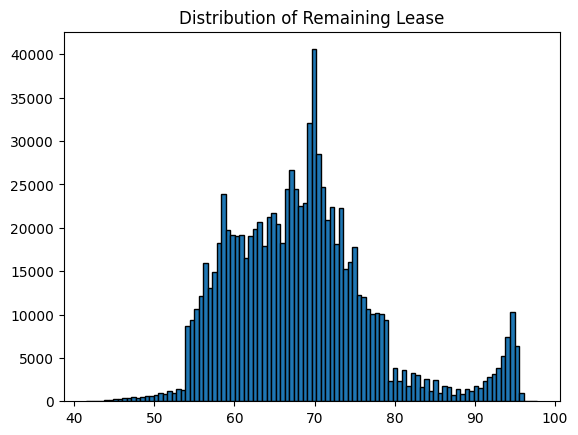

In [112]:
plt.hist(prices['remaining_lease'], bins=100, edgecolor='black')
plt.title('Distribution of Remaining Lease')
plt.show()

#### Inflation Adjustment By Consumer Price Index (CPI)

In [117]:
# Compute adjusted resale price for inflation using CPI for Housing & Utilities
# https://www.singstat.gov.sg/whats-new/latest-news/cpi-highlights

cpi['Year_Month'] = pd.to_datetime(cpi['Year_Month'], format = '%Y %b') # to datetime
cpi.rename(columns= {'Year_Month': 'transaction_date'}, inplace =True)
prices = prices.merge(cpi, on='transaction_date', how='left') 
prices['real_price'] = (prices['resale_price'] / prices['CPI']) * 100 

In [118]:
prices.columns

Index(['transaction_date', 'town', 'flat_type', 'block', 'street_name',
       'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'resale_price', 'remaining_lease', 'CPI', 'real_price'],
      dtype='object')

In [119]:
prices.head()

,transaction_date,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,CPI,real_price
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1970-01-01 00:00:00.000001977,9000.0,79.0,60.894,14779.781259
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,Improved,1970-01-01 00:00:00.000001977,6000.0,79.0,60.894,9853.187506
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1970-01-01 00:00:00.000001977,8000.0,79.0,60.894,13137.583342
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,Improved,1970-01-01 00:00:00.000001977,6000.0,79.0,60.894,9853.187506
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1970-01-01 00:00:00.000001976,47200.0,79.0,60.894,77511.741715


#### Median HDB Resale prices Over the Years (Unadjusted)

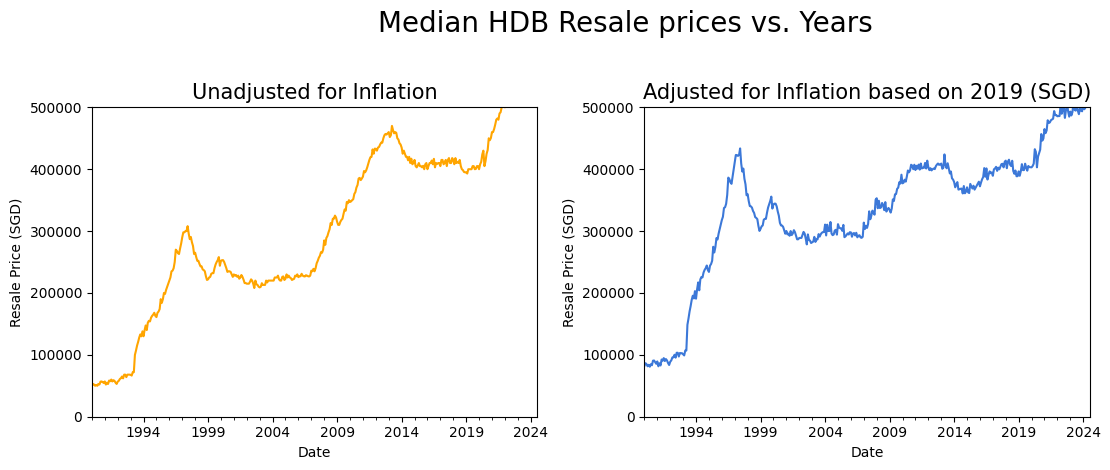

In [164]:
# Plot median resale price vs years

fig = plt.figure(figsize=(14,5)) # Create a figure 
fig.suptitle('Median HDB Resale prices vs. Years', fontsize=20)

# Unadjusted
ax1 = fig.add_subplot(121) # first subplot

# group 'prices' by 'transaction_date' (X)
# aggregate 'resale_price', maintain dataframe by giving double []. (Y)
# compute resale price mean for each 'transaction_date'
prices.groupby('transaction_date')[['resale_price']].median().plot(ax=ax1, color='orange', legend=None)

ax1.set_xlabel('Date')
ax1.set_ylabel('Resale Price (SGD)')
ax1.set_ylim(0, 500000)
ax1.set_title('Unadjusted for Inflation', size=15)


# Adjusted
ax2 = fig.add_subplot(122) # second subplot
prices.groupby('transaction_date')[['real_price']].median().plot(ax=ax2, color='#3c78d8', legend=None)

ax2.set_xlabel('Date')
ax2.set_ylabel('Resale Price (SGD)')
ax2.set_ylim(0, 500000)
ax2.set_title('Adjusted for Inflation based on 2019 (SGD)',size=15)

plt.tight_layout(rect=[0.05, 0.05, 0.85, 0.95]) 

plt.show()

#### Median Flat Resale prices Over the Years (Adjusted)

## 4. Exploratory Data Analysis (EDA)

1. Summary stats for numerical and categorical features
2. Data visualization ( histograms, box plots, scatter plot)
3. Correlation analysis : calc and visualize correlations btw features

## Chapter 5： Feature Engineering 

1. create new features
2. encoding categorical variables
3. feature scaling : normalize or standardize numerical features

## Chapter 5: In-Depth Analysis
1. segmentation analysis 
2. time series analysis
3. comparative analysis

## **Predictive Modelling part**

## Chapter 5： Feature Engineering 

1. create new features
2. encoding categorical variables
3. feature scaling : normalize or standardize numerical features